# <font color='green'>Análise de Risco no Transporte Público</font>
# <font color='green'>Análise de dados com Python</font>
## <font color='green'>Gleidson Gomes - 18/06/2023</font>

## <font color='green'>1 - Introdução</font>

Este trabalho tem como objetivo apresentar uma análise de dados baseado em dados reais públicos relativo a lista de incidente de trânsito ocorrido na cidade de Londres [1]. Assim, será possível aprofundar no assunto sob a ótica dos riscos no transporte público da cidade em questão.

O trabalho está dividido em sessões. A sessão 2 apresenta o objetivo principal do trabalho. A sessão 3 descreve o processo de análise de dados desde a preparação do conjunto de dados até a análise exploratória de dados para fins de obter infromações até  o momento não conhecidas. A sessão 4 abrange todas as perguntas de negócios respondidas por meio de histórias com uso de dados e gráficos, além de palavras.

Informações adicionais a título de trabalhos relacionados podem ser consultados em [2].

## <font color='green'>2 - Objetivo</font>

* Conhecer os incidentes de trânsito ocorridos na cidade de Londres por meio de perguntas recorrentes de negócios;


* Ir além no estudo para trazer informações até o momento não conhecidos.

## <font color='green'>3 - Preparação da base e análise exploratória dos dados</font>

In [1]:
# Instalação de pacotes
# Watermark é usado para gravar as versões de outros pacotes usados neste jupyter notebook
!pip install -q -U watermark

In [2]:
# Importação de módulos
import pandas as pd                  # pandas para manipulação de dados e análise exploratória dos dados
import matplotlib.pyplot as plt      # matplotlib para criação de gráficos e visualizações de dados em geral
import seaborn as sns                # biblioteca de visualização de dados em Python baseada em Matplotlib
# para plotar os gráficos estáticos logo abaixo da célula
%matplotlib inline                   

In [3]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [4]:
# Versões dos pacotes e linguagens utilizados neste projeto
# Versões dos pacotes
%reload_ext watermark
%watermark -a "Análise de Risco no Transporte Público" --iversions

# Versão da Linguagem python
from platform import python_version
print('python:', python_version())

Author: Análise de Risco no Transporte Público

seaborn   : 0.11.2
pandas    : 1.3.4
matplotlib: 3.4.3

python: 3.9.7


In [5]:
# Importação do conjunto de dados e armazenamento em um dataframe do pandas
df = pd.read_csv('dados/tfl_bus_safety.csv')
type(df)

pandas.core.frame.DataFrame

In [6]:
# Redefinição do nome dos atributos do conjunto de dados
df.columns = ['ano', 'data_incidente', 'tipo_rota', 'operador', 'nome_grupo', 'garagem_onibus', 'bairro', 
              'resultado_lesao', 'tipo_evento_incidente', 'categoria_vitima', 'sexo_vitima', 'faixa_etaria_vitima']

In [7]:
# Verificação da quantidade de registros e atributos
df.shape

(23158, 12)

In [8]:
# Verificação dos 5 primeiros registros do conjunto de dados
df.head(5).T

,0,1,2,3,4
ano,2015,2015,2015,2015,2015
data_incidente,2015-01-01,2015-01-01,2015-01-01,2015-01-01,2015-01-01
tipo_rota,1,4,5,5,6
operador,London General,Metroline,East London,East London,Metroline
nome_grupo,Go-Ahead,Metroline,Stagecoach,Stagecoach,Metroline
garagem_onibus,Garage Not Available,Garage Not Available,Garage Not Available,Garage Not Available,Garage Not Available
bairro,Southwark,Islington,Havering,None London Borough,Westminster
resultado_lesao,Injuries treated on scene,Injuries treated on scene,Taken to Hospital – Reported Serious Injury or...,Taken to Hospital – Reported Serious Injury or...,Reported Minor Injury - Treated at Hospital
tipo_evento_incidente,Onboard Injuries,Onboard Injuries,Onboard Injuries,Onboard Injuries,Onboard Injuries
categoria_vitima,Passenger,Passenger,Passenger,Passenger,Pedestrian


In [9]:
# Remoção de espaço em branco no início e no fim dos atributos categóricos
df['tipo_rota'] = df['tipo_rota'].str.strip()
df['operador'] = df['operador'].str.strip()
df['nome_grupo'] = df['nome_grupo'].str.strip()
df['garagem_onibus'] = df['garagem_onibus'].str.strip()
df['bairro'] = df['bairro'].str.strip()
df['resultado_lesao'] = df['resultado_lesao'].str.strip()
df['tipo_evento_incidente'] = df['tipo_evento_incidente'].str.strip()
df['categoria_vitima'] = df['categoria_vitima'].str.strip()
df['sexo_vitima'] = df['sexo_vitima'].str.strip()
df['faixa_etaria_vitima'] = df['faixa_etaria_vitima'].str.strip()

In [10]:
# Verificação da soma dos valores nulos encontrados
df.isnull().sum()

ano                      0
data_incidente           0
tipo_rota                0
operador                 0
nome_grupo               0
garagem_onibus           0
bairro                   0
resultado_lesao          0
tipo_evento_incidente    0
categoria_vitima         0
sexo_vitima              0
faixa_etaria_vitima      0
dtype: int64

In [11]:
# Tratamento do conjunto de dados
# Função para ajustar atributos sem informações
def ajustar_classe(x):
    if x == 'Unknown' or x == '(blank)' or x == 'Not specified' or x == 'Insufficient Data' or x == 'Other':
        return None
    return x

In [12]:
# Aplicação do ajuste dos atributos sem informações - transformação em nulo
df['tipo_rota'] = df['tipo_rota'].map(ajustar_classe)
df['bairro'] = df['bairro'].map(ajustar_classe)
df['categoria_vitima'] = df['categoria_vitima'].map(ajustar_classe)
df['sexo_vitima'] = df['sexo_vitima'].map(ajustar_classe)
df['faixa_etaria_vitima'] = df['faixa_etaria_vitima'].map(ajustar_classe)

In [13]:
# Verificação da soma dos valores nulos encontrados
df.isnull().sum()

ano                         0
data_incidente              0
tipo_rota                  14
operador                    0
nome_grupo                  0
garagem_onibus              0
bairro                    553
resultado_lesao             0
tipo_evento_incidente       0
categoria_vitima           18
sexo_vitima              3602
faixa_etaria_vitima      7135
dtype: int64

In [14]:
# Drop dos registros com valores ausentes em qualquer coluna (any)
print(df.shape)
df = df.dropna(how = 'any')
print(df.shape)

# Lista os valores ausentes
df[df.isnull().values].T

(23158, 12)
(14948, 12)


""
ano
data_incidente
tipo_rota
operador
nome_grupo
garagem_onibus
bairro
resultado_lesao
tipo_evento_incidente
categoria_vitima


In [15]:
# Verificação se há valores duplicados
print(df.shape)
print(df.duplicated().sum())

# Remove registros duplicados (remove uma das duplicatas)
df = df.drop_duplicates()
print(df.shape)

(14948, 12)
922
(14026, 12)


In [16]:
# Verificação do resumo de valores não nulos encontrados
df.dtypes

ano                       int64
data_incidente           object
tipo_rota                object
operador                 object
nome_grupo               object
garagem_onibus           object
bairro                   object
resultado_lesao          object
tipo_evento_incidente    object
categoria_vitima         object
sexo_vitima              object
faixa_etaria_vitima      object
dtype: object

In [17]:
# Verificação da quantidade de atributo por tipo de dado
df.dtypes.value_counts()

object    11
int64      1
dtype: int64

In [18]:
# Separação de atributos numéricos e categóricos
# Lista de atributos numéricos
nums = ['ano']
# Lista de atributos categóricos
cats = ['data_incidente', 'tipo_rota', 'operador', 'nome_grupo', 'garagem_onibus', 'bairro', 
              'resultado_lesao', 'tipo_evento_incidente', 'categoria_vitima', 'sexo_vitima', 'faixa_etaria_vitima']

In [19]:
# Resumo das variáveis numéricas
df[nums].describe()

,ano
count,14026.000000
mean,2016.507843
std,1.058423
min,2015.000000
25%,2016.000000
50%,2017.000000
75%,2017.000000
max,2018.000000


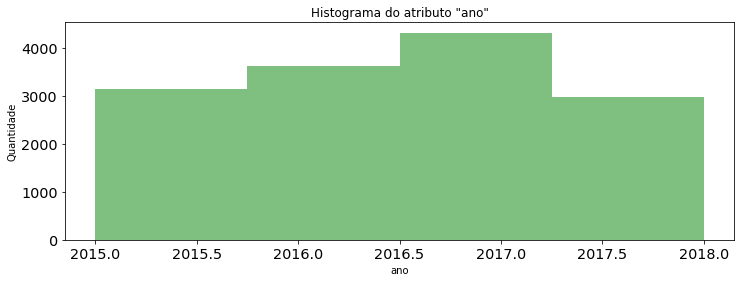

In [20]:
# Histograma do atributo ano
dados = df['ano']
num_bins = 4
plt.hist(dados, num_bins, facecolor = 'green', alpha = 0.5)
plt.title('Histograma do atributo "ano"',fontsize=12)
plt.xlabel('ano',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()

In [21]:
# Resumo das variáveis categóricas
df[cats].describe().T

,count,unique,top,freq
data_incidente,14026,45,2017-03-01,419
tipo_rota,14026,601,OOS,225
operador,14026,23,Metroline,2599
nome_grupo,14026,13,Metroline,3469
garagem_onibus,14026,83,Garage Not Available,4811
bairro,14026,34,Westminster,1025
resultado_lesao,14026,4,Injuries treated on scene,9863
tipo_evento_incidente,14026,10,Slip Trip Fall,4485
categoria_vitima,14026,11,Passenger,10911
sexo_vitima,14026,2,Female,8199


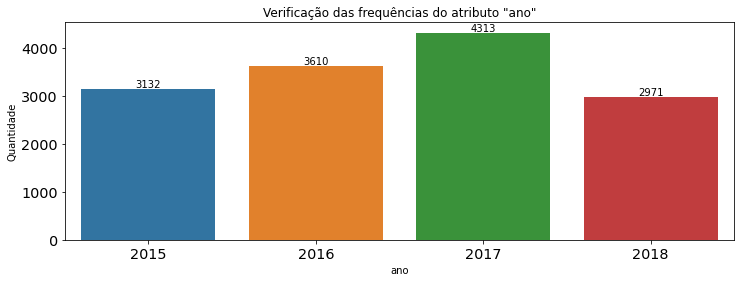

In [22]:
# Verificação das frequências dos atributos categóricos
# ano

# Plot
ax = sns.countplot(data = df, x = 'ano', label = 'Count')

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Verificação das frequências do atributo "ano"',fontsize=12)
plt.xlabel('ano',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()
#print(df["ano"].unique())

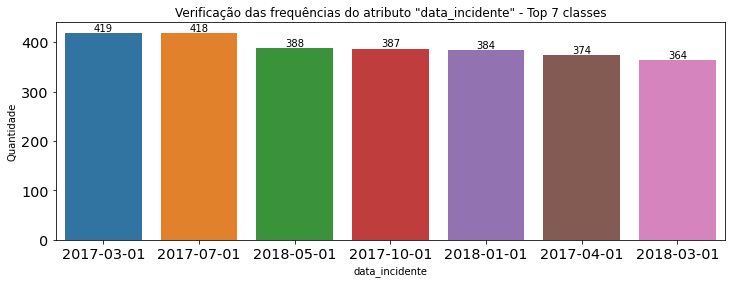

In [23]:
# Top 7 classes do atributo 
# data_incidente

# Plot
ax = sns.countplot(data = df, x = 'data_incidente', order = df.data_incidente.value_counts().iloc[:7].index)

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Verificação das frequências do atributo "data_incidente" - Top 7 classes',fontsize=12)
plt.xlabel('data_incidente',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()
#df["data_incidente"].unique()

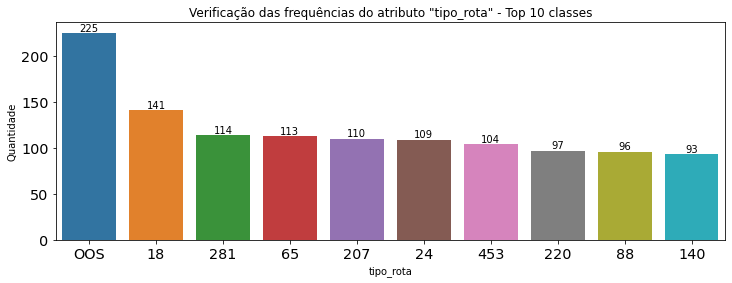

In [24]:
# Top 10 classes do atributo 
# tipo_rota

# Plot
ax = sns.countplot(data = df, x = 'tipo_rota', order=df.tipo_rota.value_counts().iloc[:10].index)

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Verificação das frequências do atributo "tipo_rota" - Top 10 classes',fontsize=12)
plt.xlabel('tipo_rota',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()
#df["tipo_rota"].unique()

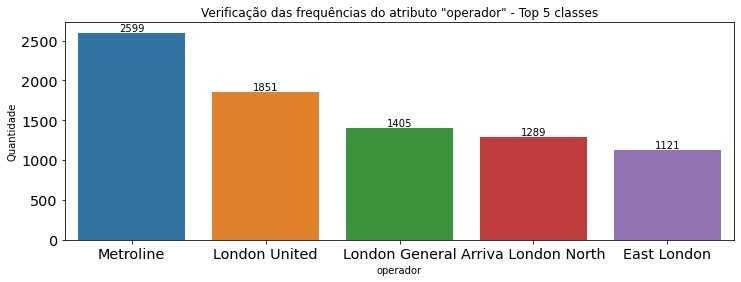

In [25]:
# Top 5 classes do atributo 
# operador

# Plot
ax = sns.countplot(data = df, x = 'operador', order=df.operador.value_counts().iloc[:5].index)

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Verificação das frequências do atributo "operador" - Top 5 classes',fontsize=12)
plt.xlabel('operador',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()
#df["operador"].unique()

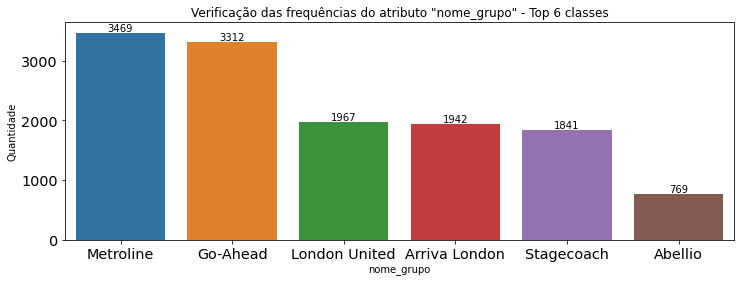

In [26]:
# Top 6 classes do atributo 
# nome_grupo

# Plot
ax = sns.countplot(data = df, x = 'nome_grupo', order=df.nome_grupo.value_counts().iloc[:6].index)

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Verificação das frequências do atributo "nome_grupo" - Top 6 classes',fontsize=12)
plt.xlabel('nome_grupo',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()
# df["nome_grupo"].unique()

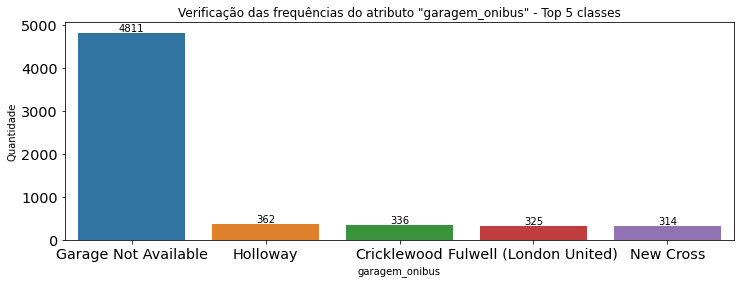

In [27]:
# Top 5 classes do atributo 
# garagem_onibus

# Plot
ax = sns.countplot(data = df, x = 'garagem_onibus', order=df.garagem_onibus.value_counts().iloc[:5].index)

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Verificação das frequências do atributo "garagem_onibus" - Top 5 classes',fontsize=12)
plt.xlabel('garagem_onibus',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()
#df["garagem_onibus"].unique()

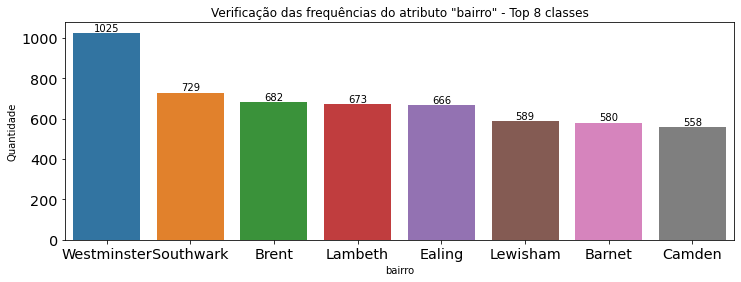

In [28]:
# Top 8 classes do atributo 
# bairro

# Plot
ax = sns.countplot(data = df, x = 'bairro', order=df.bairro.value_counts().iloc[:8].index)

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Verificação das frequências do atributo "bairro" - Top 8 classes',fontsize=12)
plt.xlabel('bairro',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()
#df["bairro"].unique()

Número de registro  em A1 (Injuries treated on scene):  9863
Número de registro  em A2 (Taken to Hospital – Reported Serious Injury or Severity Unknown):  2122
Número de registro  em A3 (Reported Minor Injury - Treated at Hospital):  2001
Número de registro  em A4 (Fatal):  40


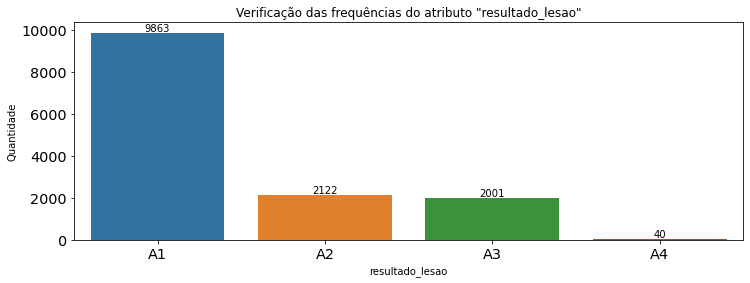

In [29]:
# resultado_lesao

# Função para ajustar atributos sem informações
def ajustar_label(x):
    if x == 'Injuries treated on scene':
        return 'A1'
    elif x == 'Taken to Hospital – Reported Serious Injury or Severity Unknown':
        return 'A2'
    elif x == 'Reported Minor Injury - Treated at Hospital':
        return 'A3'
    elif x == 'Fatal':
        return 'A4'

# Aplicação do ajuste dos labels
df2 = df.copy(deep=True) # True=qualquer alteração feita na cópia não será reflectida no DataFrame original. False=quaisquer alterações feitas na cópia também serão reflectidas no DataFrame original. 
df2['resultado_lesao'] = df2['resultado_lesao'].map(ajustar_label)

# Plot
ax = sns.countplot(data = df2, x = 'resultado_lesao', label = 'Count')

# Value counts
temp1, temp2, temp3, temp4 = df2['resultado_lesao'].value_counts()

# Print
print('Número de registro  em A1 (Injuries treated on scene): ', temp1)
print('Número de registro  em A2 (Taken to Hospital – Reported Serious Injury or Severity Unknown): ', temp2)
print('Número de registro  em A3 (Reported Minor Injury - Treated at Hospital): ', temp3)
print('Número de registro  em A4 (Fatal): ', temp4)

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Verificação das frequências do atributo "resultado_lesao"',fontsize=12)
plt.xlabel('resultado_lesao',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()
#df["resultado_lesao"].unique()

Número de registro  em B01 (Slip Trip Fall):  4485
Número de registro  em B02 (Onboard Injuries):  3615
Número de registro  em B03 (Personal Injury):  2710
Número de registro  em B04 (Collision Incident):  2541
Número de registro  em B05 (Assault):  489
Número de registro  em B06 (Activity Incident Event):  81
Número de registro  em B07 (Vandalism Hooliganism):  53
Número de registro  em B08 (Safety Critical Failure):  46
Número de registro  em B09 (Fire):  3
Número de registro  em B10 (Robbery):  3


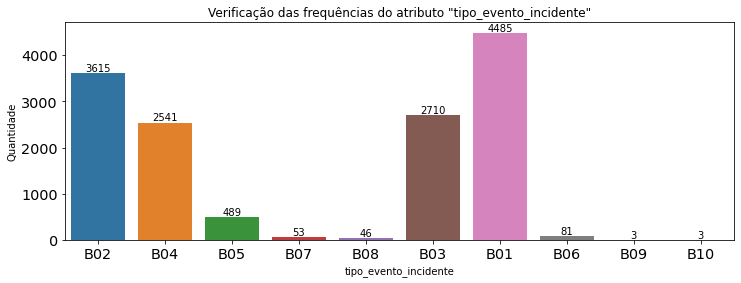

In [30]:
# tipo_evento_incidente

# Função para ajustar atributos sem informações
def ajustar_label(x):
    if x == 'Slip Trip Fall':
        return 'B01'
    elif x == 'Onboard Injuries':
        return 'B02'
    elif x == 'Personal Injury':
        return 'B03'
    elif x == 'Collision Incident':
        return 'B04'
    elif x == 'Assault':
        return 'B05'
    elif x == 'Activity Incident Event':
        return 'B06'
    elif x == 'Vandalism Hooliganism':
        return 'B07'
    elif x == 'Safety Critical Failure':
        return 'B08'
    elif x == 'Fire':
        return 'B09'
    elif x == 'Robbery':
        return 'B10'

# Aplicação do ajuste dos labels
df2['tipo_evento_incidente'] = df2['tipo_evento_incidente'].map(ajustar_label)

# Plot
ax = sns.countplot(data = df2, x = 'tipo_evento_incidente', label = 'Count')

# Value counts
temp1, temp2, temp3, temp4, temp5, temp6, temp7, temp8, temp9, temp10 = df2['tipo_evento_incidente'].value_counts()

# Print
print('Número de registro  em B01 (Slip Trip Fall): ', temp1)
print('Número de registro  em B02 (Onboard Injuries): ', temp2)
print('Número de registro  em B03 (Personal Injury): ', temp3)
print('Número de registro  em B04 (Collision Incident): ', temp4)
print('Número de registro  em B05 (Assault): ', temp5)
print('Número de registro  em B06 (Activity Incident Event): ', temp6)
print('Número de registro  em B07 (Vandalism Hooliganism): ', temp7)
print('Número de registro  em B08 (Safety Critical Failure): ', temp8)
print('Número de registro  em B09 (Fire): ', temp9)
print('Número de registro  em B10 (Robbery): ', temp10)

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Verificação das frequências do atributo "tipo_evento_incidente"',fontsize=12)
plt.xlabel('tipo_evento_incidente',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()
#df["tipo_evento_incidente"].unique()

Leganda categoria_vitima:
Número de registro  em C01 (Passenger):  10911
Número de registro  em C02 (Bus Driver):  1383
Número de registro  em C03 (Pedestrian):  997
Número de registro  em C04 (3rd Party driver / Occupant):  350
Número de registro  em C05 (Cyclist):  187
Número de registro  em C06 (Member Of Public):  72
Número de registro  em C07 (Motorcyclist):  70
Número de registro  em C08 (Operational Staff):  38
Número de registro  em C09 (Conductor):  9
Número de registro  em C10 (Contractor Staff):  6
Número de registro  em C11 (TfL Staff):  3


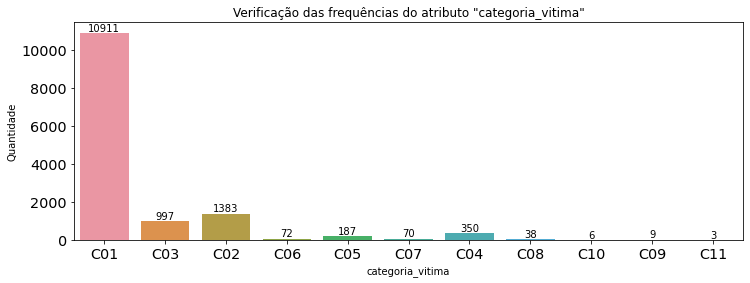

In [31]:
# categoria_vitima

# Função para ajustar atributos sem informações
def ajustar_label(x):
    if x == 'Passenger':
        return 'C01'
    elif x == 'Bus Driver':
        return 'C02'
    elif x == 'Pedestrian':
        return 'C03'
    elif x == '3rd Party driver / Occupant':
        return 'C04'
    elif x == 'Cyclist':
        return 'C05'
    elif x == 'Member Of Public':
        return 'C06'
    elif x == 'Motorcyclist':
        return 'C07'
    elif x == 'Operational Staff':
        return 'C08'
    elif x == 'Conductor':
        return 'C09'
    elif x == 'Contractor Staff':
        return 'C10'
    elif x == 'TfL Staff':
        return 'C11'

# Aplicação do ajuste dos labels
df2['categoria_vitima'] = df2['categoria_vitima'].map(ajustar_label)

# Plot
ax = sns.countplot(data = df2, x = 'categoria_vitima', label = 'Count')

# Value counts
temp1, temp2, temp3, temp4, temp5, temp6, temp7, temp8, temp9, temp10, temp11 = df2['categoria_vitima'].value_counts()

# Print
print('Leganda categoria_vitima:')
print('Número de registro  em C01 (Passenger): ', temp1)
print('Número de registro  em C02 (Bus Driver): ', temp2)
print('Número de registro  em C03 (Pedestrian): ', temp3)
print('Número de registro  em C04 (3rd Party driver / Occupant): ', temp4)
print('Número de registro  em C05 (Cyclist): ', temp5)
print('Número de registro  em C06 (Member Of Public): ', temp6)
print('Número de registro  em C07 (Motorcyclist): ', temp7)
print('Número de registro  em C08 (Operational Staff): ', temp8)
print('Número de registro  em C09 (Conductor): ', temp9)
print('Número de registro  em C10 (Contractor Staff): ', temp10)
print('Número de registro  em C11 (TfL Staff): ', temp11)

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Verificação das frequências do atributo "categoria_vitima"',fontsize=12)
plt.xlabel('categoria_vitima',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()
#df["categoria_vitima"].unique()

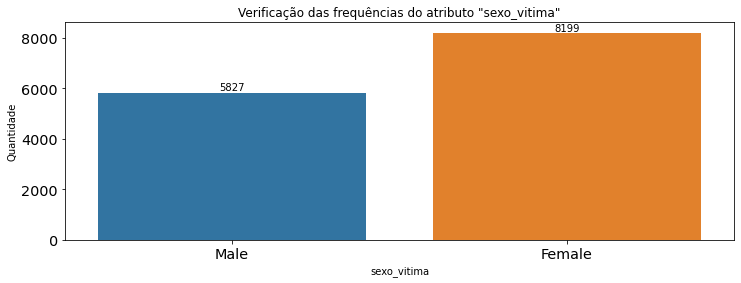

In [32]:
# sexo_vitima

# Plot
ax = sns.countplot(data = df, x = 'sexo_vitima')

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Verificação das frequências do atributo "sexo_vitima"',fontsize=12)
plt.xlabel('sexo_vitima',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()
#df["sexo_vitima"].unique()

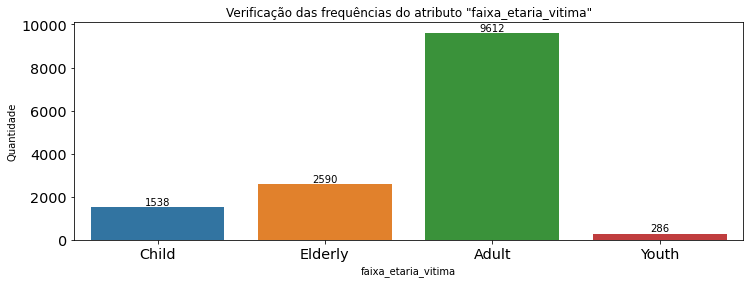

In [33]:
# faixa_etaria_vitima

# Plot
ax = sns.countplot(data = df, x = 'faixa_etaria_vitima')

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Verificação das frequências do atributo "faixa_etaria_vitima"',fontsize=12)
plt.xlabel('faixa_etaria_vitima',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()
#df["faixa_etaria_vitima"].unique()

## <font color='green'>4 - Conhecer os incidentes de trânsito ocorridos na cidade de Londres</font>

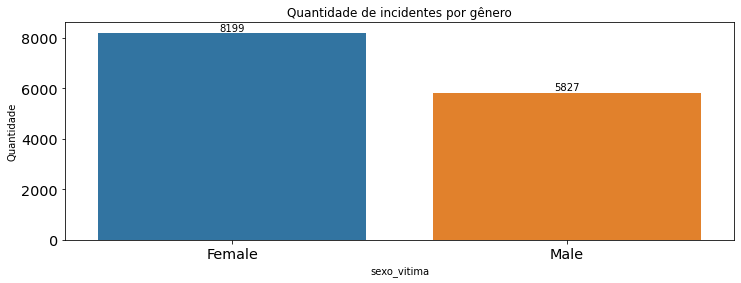

In [34]:
# 1- Qual a quantidade de incidentes por gênero?

# Plot
ax = sns.countplot(data = df, x = 'sexo_vitima', order = df['sexo_vitima'].value_counts().index)

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Quantidade de incidentes por gênero',fontsize=12)
plt.xlabel('sexo_vitima',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()

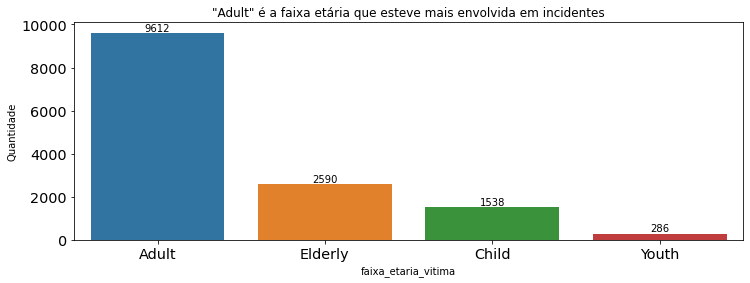

In [35]:
#2- Qual faixa etária esteve mais envolvida nos incidentes?

# Plot
ax = sns.countplot(data = df, x = 'faixa_etaria_vitima', order = df['faixa_etaria_vitima'].value_counts().index)

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('"Adult" é a faixa etária que esteve mais envolvida em incidentes',fontsize=12)
plt.xlabel('faixa_etaria_vitima',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()

Leganda tipo_evento_incidente:
B01 (Slip Trip Fall)
B02 (Onboard Injuries)
B03 (Personal Injury)
B04 (Collision Incident)
B05 (Assault)
B06 (Activity Incident Event)
B07 (Vandalism Hooliganism)
B08 (Safety Critical Failure)
B09 (Fire)
B10 (Robbery)


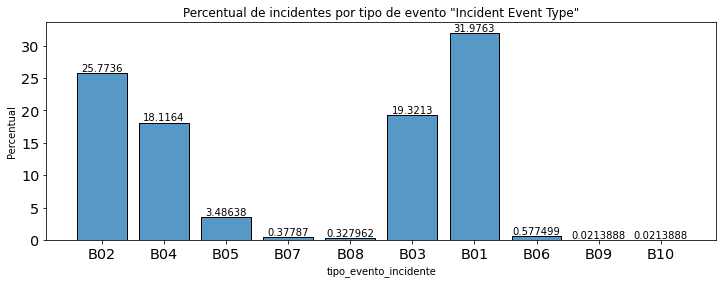

In [36]:
# 3- Qual o percentual de incidentes por tipo de evento (Incident Event Type)?

# Print
print('Leganda tipo_evento_incidente:')
print('B01 (Slip Trip Fall)')
print('B02 (Onboard Injuries)')
print('B03 (Personal Injury)')
print('B04 (Collision Incident)')
print('B05 (Assault)')
print('B06 (Activity Incident Event)')
print('B07 (Vandalism Hooliganism)')
print('B08 (Safety Critical Failure)')
print('B09 (Fire)')
print('B10 (Robbery)')

# Histplot
ax = sns.histplot(data = df2, x = 'tipo_evento_incidente', stat = 'percent', multiple = 'dodge', shrink=.8)

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Percentual de incidentes por tipo de evento "Incident Event Type"',fontsize=12)
plt.xlabel('tipo_evento_incidente',fontsize=10) 
plt.ylabel('Percentual',fontsize=10)
plt.show()

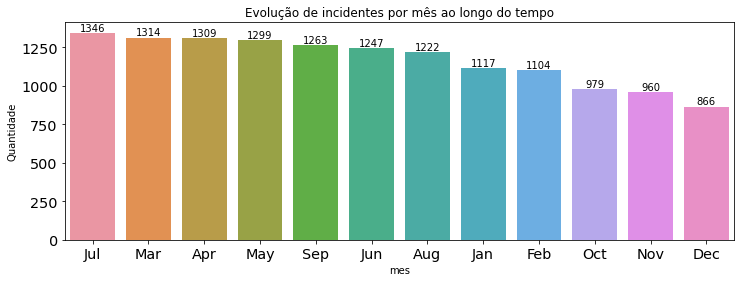

In [37]:
#4- Como foi a evolução de incidentes por mês ao longo do tempo?

# Criação novo atributo mes
df2['data_incidente'] = pd.to_datetime(df['data_incidente'])
df2['mes'] = pd.to_datetime(df2['data_incidente'], format='%m').dt.month_name().str.slice(stop=3)

# Countplot
ax = sns.countplot(data = df2, x = 'mes', order = df2['mes'].value_counts().index)

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Evolução de incidentes por mês ao longo do tempo',fontsize=12)
plt.xlabel('mes',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()

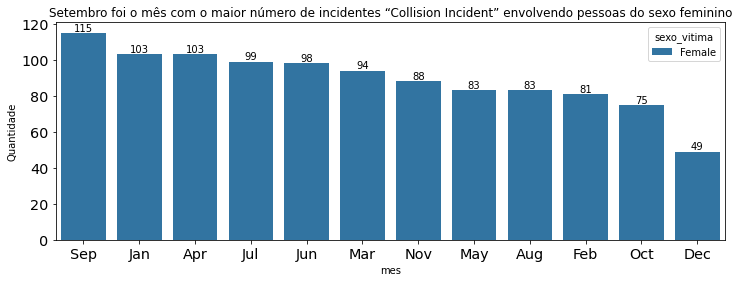

In [38]:
#5- Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo 
#pessoas do sexo feminino?

# Plot
df3 = df2[(df2['tipo_evento_incidente'] == 'B04') & (df2['sexo_vitima'] == 'Female')]
ax = sns.countplot(data = df3, x = 'mes', hue = 'sexo_vitima', order = df3['mes'].value_counts().index)

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Setembro foi o mês com o maior número de incidentes “Collision Incident” envolvendo pessoas do sexo feminino',
          fontsize=12)
plt.xlabel('mes',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()

In [39]:
#6- Qual foi a média de incidentes por mês envolvendo crianças (Child)?
 
# Filter register
df4 = df2[(df2['faixa_etaria_vitima'] == 'Child')]

# Criação de novo atriburo
df4['quantidade'] = pd.to_numeric('1')

# Quantidade de incidentes por mês e ano
x = df4.groupby(['mes', 'ano'])['quantidade'].count()
#print(x)

C:\Users\gleid\AppData\Local\Temp/ipykernel_30412/477326263.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['quantidade'] = pd.to_numeric('1')


Média de incidentes por mês envolvendo crianças "Child"


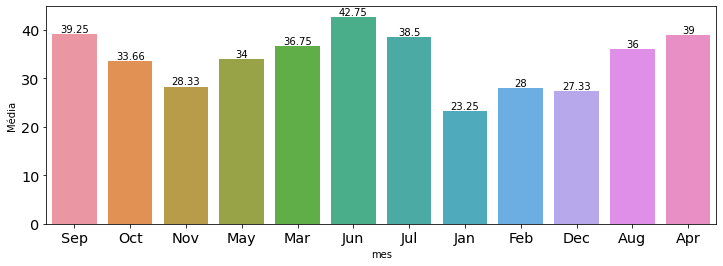

In [40]:
# Cálculo da média de cada mês
dados = [['Sep', 39.25], ['Oct', 33.66], ['Nov', 28.33], ['May', 34.00], ['Mar', 36.75], ['Jun', 42.75], 
         ['Jul', 38.50], ['Jan', 23.25], ['Feb', 28.00], ['Dec', 27.33], ['Aug', 36.00], ['Apr', 39.00]]
df_temp = pd.DataFrame(dados)
df_temp.columns = ['mes', 'media']

# Plot
ax = sns.barplot(data = df_temp, x = 'mes', y = 'media')
 
# Value counts
for label in ax.containers:
    ax.bar_label(label)
print('Média de incidentes por mês envolvendo crianças "Child"')
plt.xlabel('mes',fontsize=10) 
plt.ylabel('Média',fontsize=10)
plt.show()

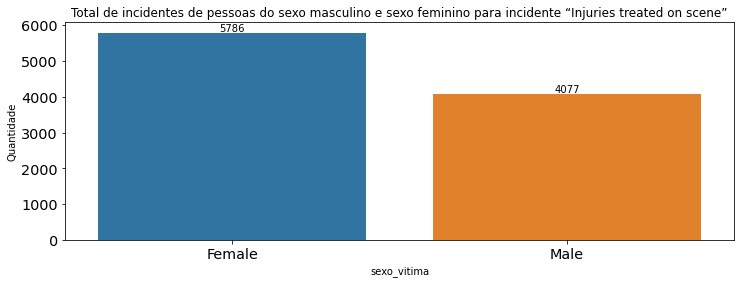

In [41]:
#7- Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), 
#qual o total de incidentes de pessoas do sexo masculino e sexo feminino?

# Filter register
df5 = df[(df['resultado_lesao'] == 'Injuries treated on scene')]
ax = sns.countplot(data = df5, x = 'sexo_vitima', order = df5['sexo_vitima'].value_counts().index)

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Total de incidentes de pessoas do sexo masculino e sexo feminino para incidente “Injuries treated on scene”',
          fontsize=12)
plt.xlabel('sexo_vitima',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()

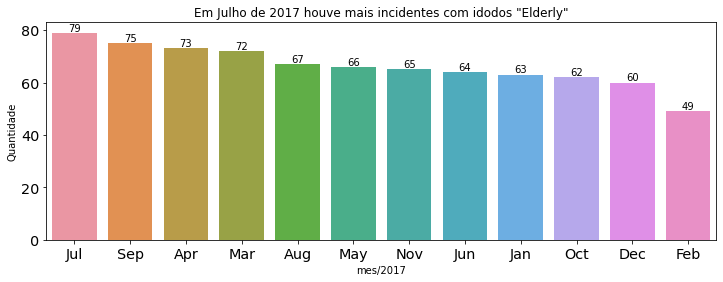

In [42]:
#8- No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?

# Plot
df6 = df2[(df2['faixa_etaria_vitima'] == 'Elderly') & (df2['ano'] == 2017)]
ax = sns.countplot(data = df6, x = 'mes', order = df6['mes'].value_counts().index)

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('Em Julho de 2017 houve mais incidentes com idodos "Elderly"',fontsize=12)
plt.xlabel('mes/2017',fontsize=10) 
plt.ylabel('Quantidade',fontsize=10)
plt.show()

Distribuição de incidentes ao longo do tempo (ano) para o "operador"


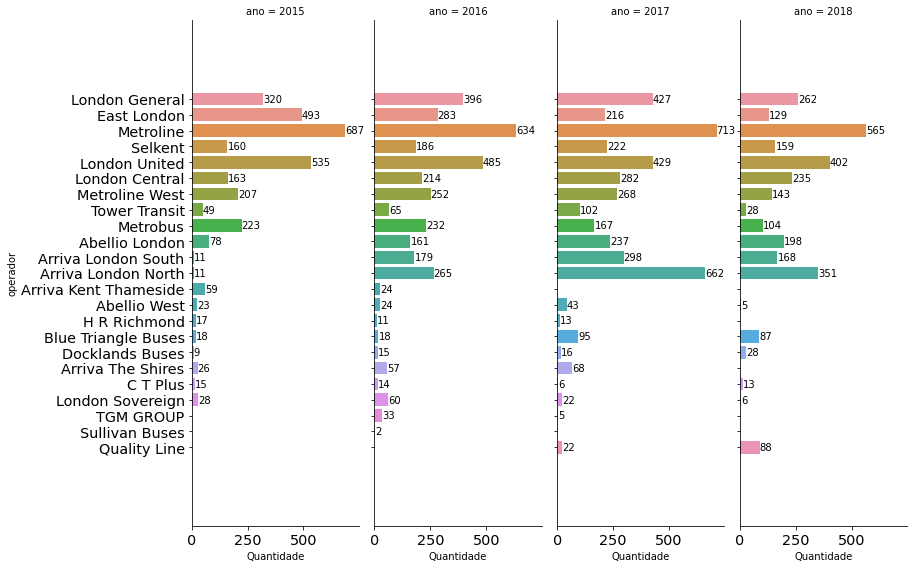

In [43]:
#9- Considerando o Operador qual a distribuição de incidentes ao longo do tempo?

# Impressão do título
print('Distribuição de incidentes ao longo do tempo (ano) para o "operador"')

# Plot
g = sns.catplot(data = df, y = 'operador', col = 'ano', kind = 'count', height = 8, aspect = .4)
g.set_axis_labels('Quantidade', 'operador')

# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)

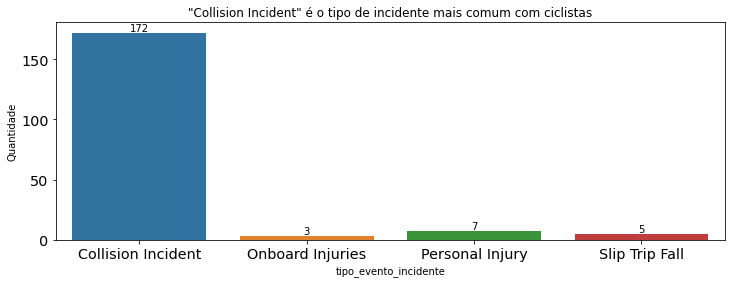

In [44]:
#10- Qual o tipo de incidente mais comum com ciclistas?

# Plot
df7 = df[(df['categoria_vitima'] == 'Cyclist')]
ax = sns.countplot(data = df7, x = 'tipo_evento_incidente')

# Value counts
for label in ax.containers:
    ax.bar_label(label)
plt.title('"Collision Incident" é o tipo de incidente mais comum com ciclistas',fontsize=12)
plt.xlabel('tipo_evento_incidente', fontsize=10) 
plt.ylabel('Quantidade', fontsize=10)
plt.show()

In [45]:
# Exportação do dataframe do pandas em arquivo texto
df.to_csv('dados/tfl_bus_safety_versao_tratada.csv')

## <font color='green'>5 - Referências bibliograficas</font>

[1]  2018/W51: London Bus Safety Performance. Disponível em: https://data.world/makeovermonday/2018w51. Acesso em junho de 2023.


[2] Cardoso, Carlos Eduardo de Paiva. Análise do transporte coletivo urbano sob a ótica dos riscos e carências sociais. Disponível em: https://tede2.pucsp.br/handle/handle/17901. Acesso em junho de 2023.